## Predicting if a person would buy life insurnace based on his age using logistic regression

### Import Libraries

In [62]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### DataSet

In [2]:
df = pd.read_excel("insurance.xlsx")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


###  Apply EDA

In [29]:
df.shape

(27, 2)

In [30]:
df.columns

Index(['age', 'bought_insurance'], dtype='object')

In [31]:
df.dtypes

age                 int64
bought_insurance    int64
dtype: object

In [32]:
df.nunique()

age                 24
bought_insurance     2
dtype: int64

In [33]:
df.isnull()

,age,bought_insurance
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [34]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [35]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


<AxesSubplot:>

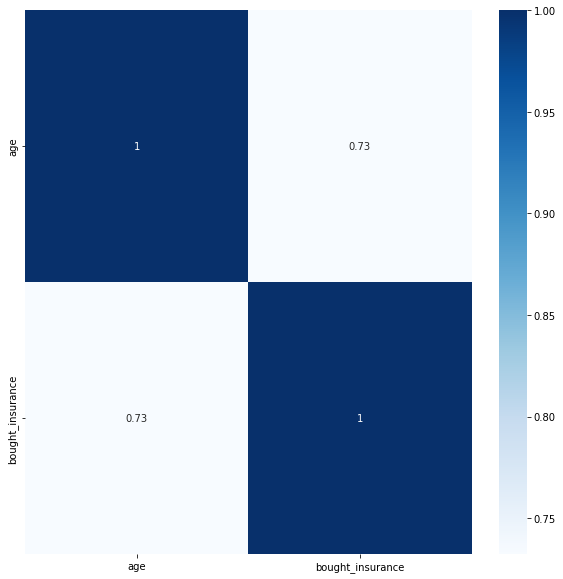

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='Blues')

c:\Users\DELL\miniconda3\envs\Magsi\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


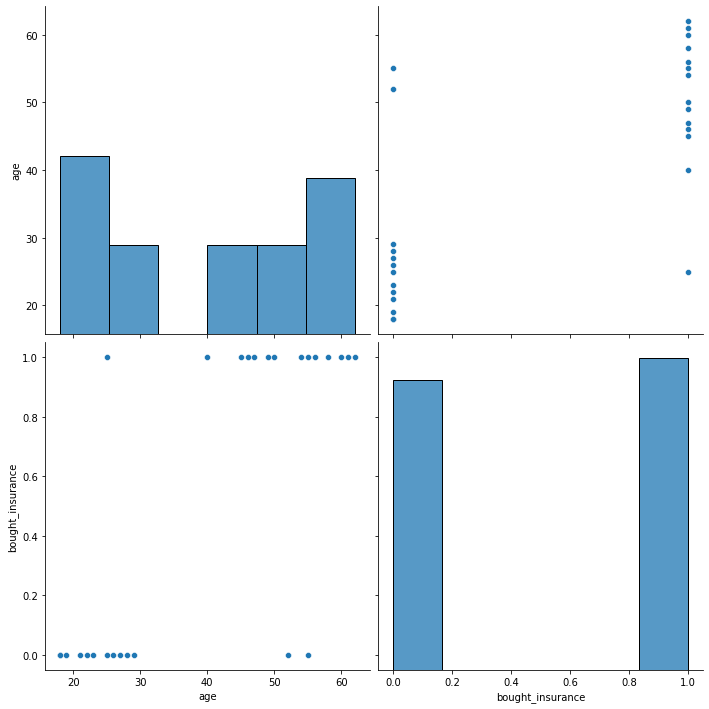

In [38]:
sns.pairplot(df, size=5)

<AxesSubplot:>

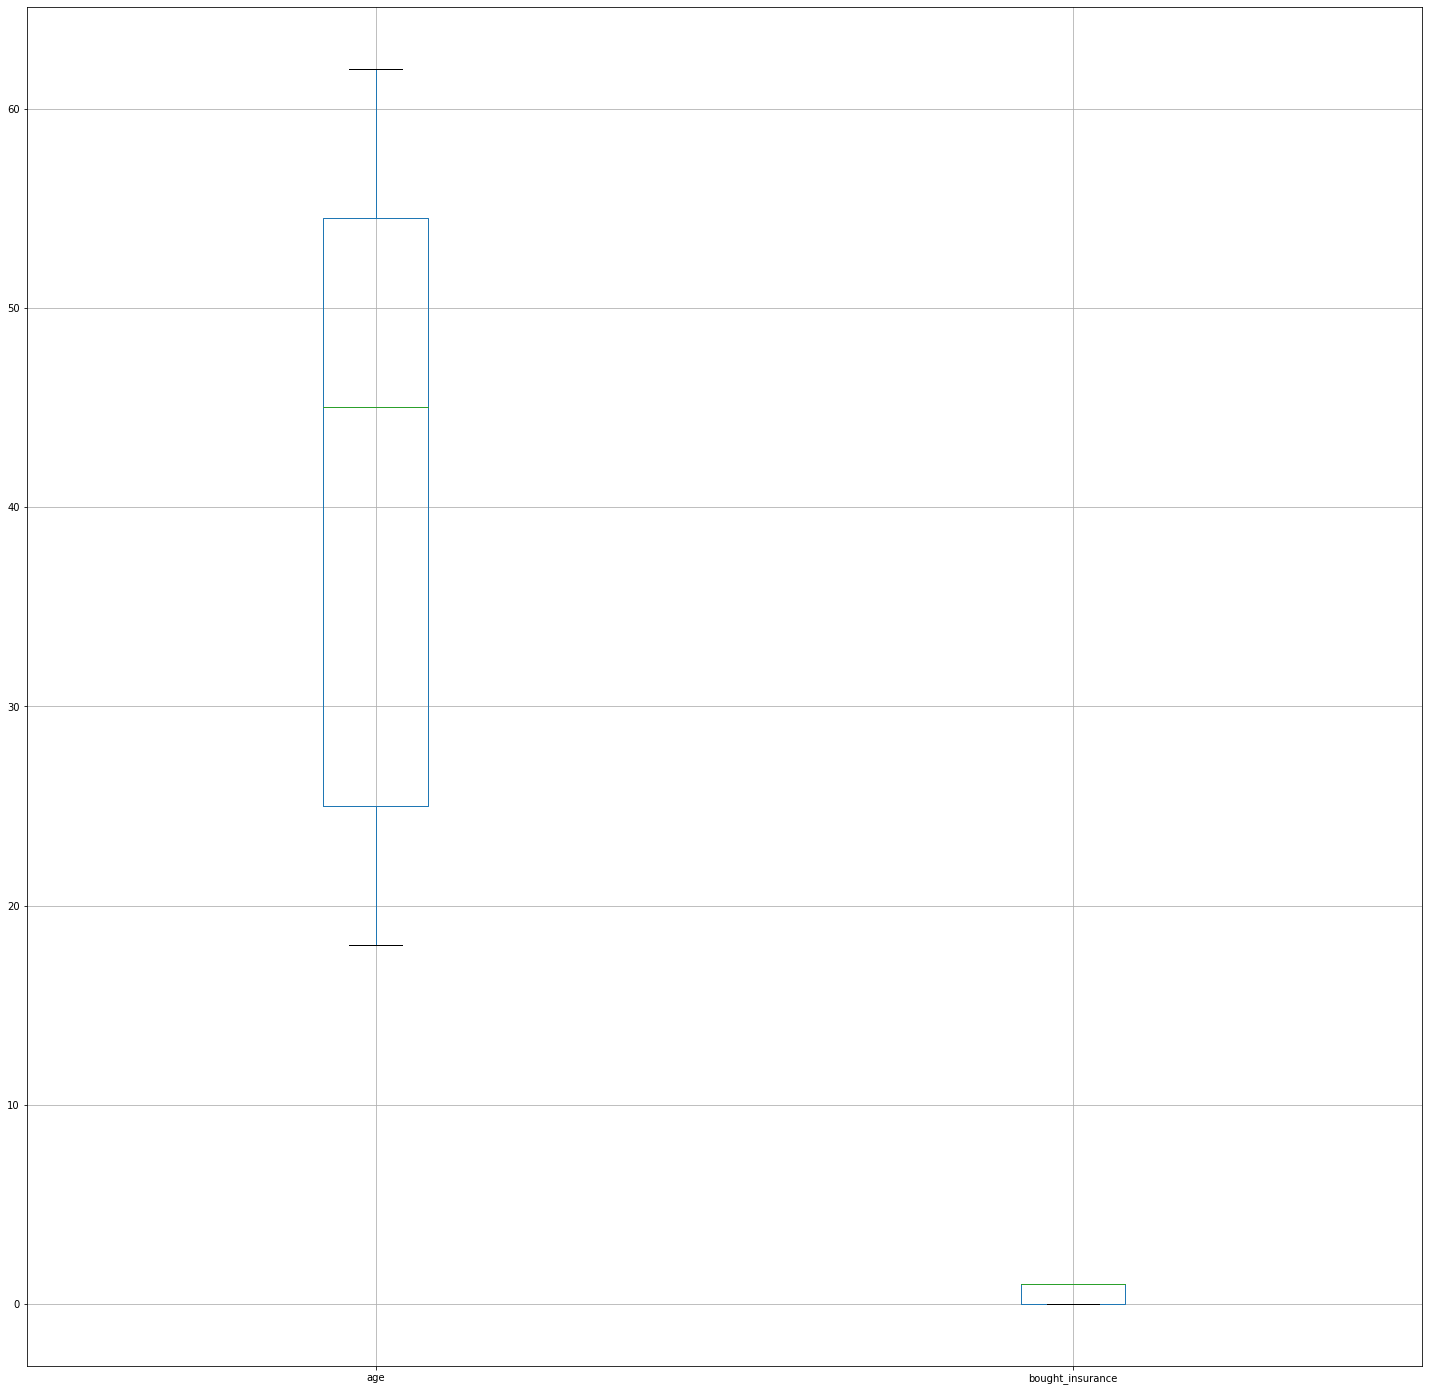

In [39]:
#Plot a BoxPlot
plt.figure(figsize=(25,25))
df.boxplot()

In [41]:
df.columns

Index(['age', 'bought_insurance'], dtype='object')

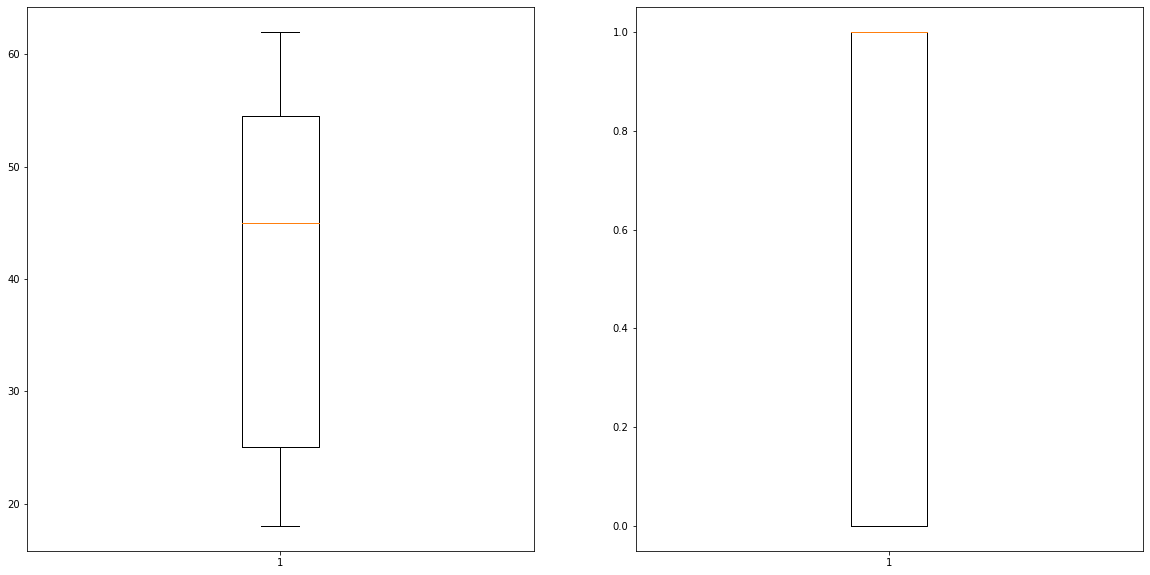

In [42]:
color = sns.color_palette()
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.boxplot(df['age'])
plt.subplot(1,2,2)
plt.boxplot(df['bought_insurance'])
plt.show()

###  person with 35 age will not buy insurance

In [44]:
px.bar(df, df['age']>40, df['bought_insurance'], color='age')

In [46]:
px.bar(df , df['bought_insurance'], df['age']<40, color='age')

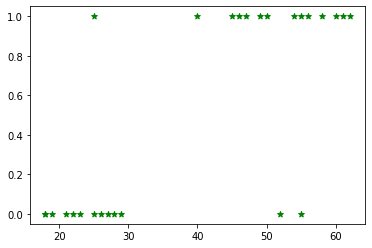

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='Green')

### Model Traning

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)


In [7]:
X_test


,age
19,18
0,22
1,25
6,55
14,49
12,27


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
X_test

,age
19,18
0,22
1,25
6,55
14,49
12,27


### Predicting Values

In [11]:
y_predicted = model.predict(X_test)

In [12]:
model.predict_proba(X_test)

array([[0.93443456, 0.06556544],
       [0.88573451, 0.11426549],
       [0.83077679, 0.16922321],
       [0.04850542, 0.95149458],
       [0.11275956, 0.88724044],
       [0.78357836, 0.21642164]])

In [13]:
model.score(X_test,y_test)

0.8333333333333334

In [14]:
y_predicted

array([0, 0, 0, 1, 1, 0], dtype=int64)

In [15]:
X_test

,age
19,18
0,22
1,25
6,55
14,49
12,27


model.coef_ indicates value of m in y=m*x + b equation

In [16]:
model.coef_

array([[0.15225003]])

In [17]:
model.intercept_

array([-5.39739342])

In [18]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [19]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [28]:
age = 25
prediction_function(age)

0.382252125230751

In [27]:
age = 70
prediction_function(age)

0.8037659436342209

In [24]:
age = 43
prediction_function(age)

0.568565299077705

### Pridiction

In [53]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0], dtype=int64)

### Generating Plots

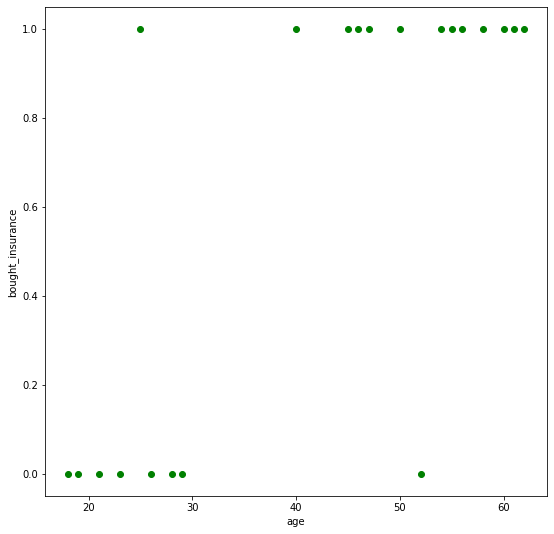

In [54]:
plt.figure(figsize=(9,9))
plt.scatter(X_train, y_train, color='green')
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.show()

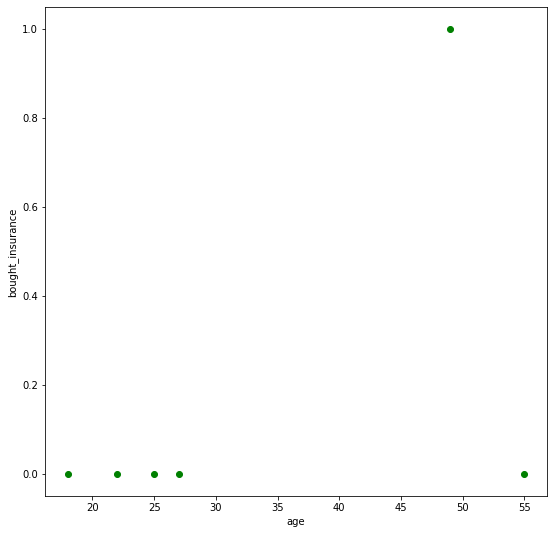

In [55]:
plt.figure(figsize=(9,9))
plt.scatter(X_test, y_test, color='green')
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.show()

In [56]:
print('Accuracy on training data: ', model.score(X_train, y_train) * 100)
print('Accuracy on testing data: ', model.score(X_test, y_test) * 100)

Accuracy on training data:  90.47619047619048
Accuracy on testing data:  83.33333333333334


In [61]:
print('Accuracy : ', accuracy_score(y_test, y_pred) * 100)

Accuracy :  83.33333333333334
